### Yapay Sinir Ağları Modeli oluşturacağız. Bir şirketin finansal durumunu kayıt altına aldığını ve, gelir ve maliyet adı altında 2 değişkenli bir veri setine sahip olduğunu düşünelim.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Veri setini oluşturalım.

data = pd.DataFrame({
    'Gelir': np.random.randint(5000, 20000, size=200),
    'Maliyet': np.random.randint(2000, 7000, size=200)
})
data.head()

,Gelir,Maliyet
0,11518,5145
1,16410,5128
2,13709,5486
3,14028,4307
4,18454,3858


In [3]:
# Eksik Verileri Gözlemleyelim.
data.isnull().sum()

Gelir      0
Maliyet    0
dtype: int64

In [4]:
# Eksik Verileri Dolduralım.
data['Gelir'].fillna(data['Gelir'].mean(), inplace=True)

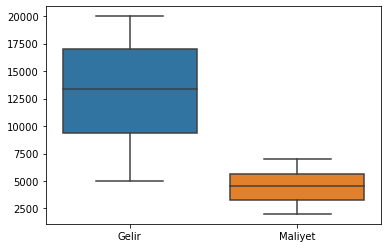

In [5]:
# Aykırı Gözlemleri Gözlemleyelim.
sns.boxplot(data=data);

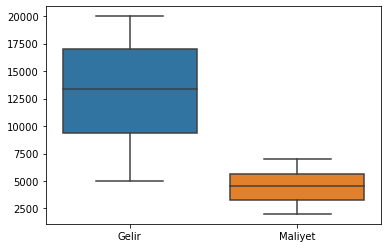

In [6]:
sns.boxplot(data=data);

# Model İşlemleri

In [7]:
# bağımlı ve bağımsız değişkeni oluşturalım.
X = data['Maliyet'].values.reshape(-1, 1)
y = data['Gelir']

In [8]:
# Eğitim ve test setlerini ayıralım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Modeli oluşturalım ve Eğitelim.
model = MLPRegressor().fit(X_train, y_train)

C:\Users\murat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
# tahmin yapalım.
y_pred = model.predict(X_test)

In [11]:
# Modeli Değerlendirelim.
r2 = r2_score(y_test, y_pred)
mse = r2_score(y_test, y_pred)
print('R-Kare Değeri: ', r2)
print('MSE Değeri: ', mse)

R-Kare Değeri:  -1.644049352257419
MSE Değeri:  -1.644049352257419


# Model Tuning İşlemleri

In [13]:
import warnings
params = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    
}
warnings.filterwarnings('ignore')
grid = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

print('Best Model: ', grid.best_estimator_)
print('Best Parameters: ', grid.best_params_)

Best Model:  MLPRegressor(activation='tanh', alpha=0.001, hidden_layer_sizes=(50,),
             solver='lbfgs')
Best Parameters:  {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'solver': 'lbfgs'}


# En iyi parametreler için modelimizi kuralım.

In [14]:
model = MLPRegressor(activation='tanh', alpha=0.001, hidden_layer_sizes=(50,), solver='lbfgs').fit(X_train, y_train)

In [19]:
y_pred = model.predict(X_test)

In [20]:
r2 = r2_score(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
print('R-Square Value:  ', r2)
print('MSE Value: ', mse)

R-Square Value:   -1.515293008531892e+16
MSE Value:  18557806.77827371
